In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import numpy as np
from time import time

In [2]:
df=pd.read_csv('C:\\Users\\nafissaad\\Time Series\\catfish.csv',
                  index_col='Date',parse_dates=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1986-01-01 to 2012-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   324 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [3]:
df = df.asfreq(pd.infer_freq(df.index))
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1986-01-01 to 2012-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   324 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


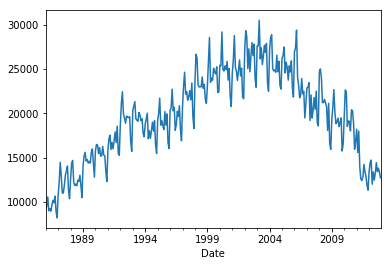

In [4]:
df['Total'].plot()
df

In [5]:
Stationary=df['Total'].diff(1)
Stationary1=Stationary.dropna()

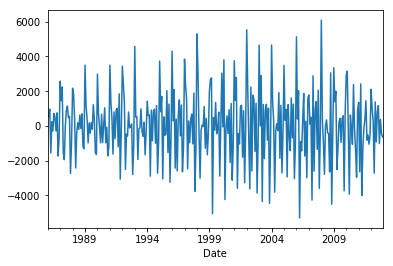

In [6]:
Stationary.plot()

In [7]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
adfuller_test(Stationary1)

ADF Test Statistics : -4.310935282406736
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 0.00042523708517162113
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 17
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 305
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


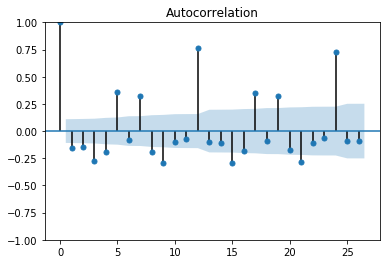

In [9]:
pacf_plot = plot_acf(Stationary1)

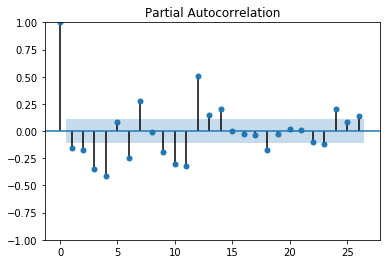

In [10]:
pacf_vals = plot_pacf(Stationary1,method='ywm')

In [11]:
#Get traininf and testing sets
train_end=datetime(2012,3,1)
test_end=datetime(2012,12,1)
train_data=Stationary1[:train_end]
test_data=Stationary1[train_end+timedelta(days=1):test_end]
train_data.dropna()

Date
1986-02-01     562.0
1986-03-01     962.0
1986-04-01   -1556.0
1986-05-01     237.0
1986-06-01    -288.0
               ...  
2011-11-01   -1050.0
2011-12-01    -522.0
2012-01-01    2106.0
2012-02-01    1020.0
2012-03-01     270.0
Freq: MS, Name: Total, Length: 314, dtype: float64

9

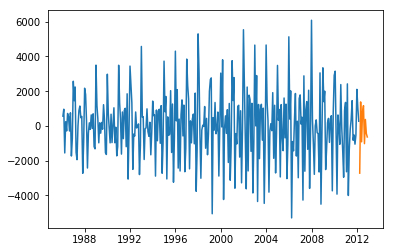

In [12]:
plt.plot(train_data)
plt.plot(test_data)
len(test_data)

In [13]:
#define model
model=ARIMA(train_data,order=(4,0,0))

In [14]:
#fit the model
start=time()
model_fit=model.fit()
end=time()
print('Model Fitting Time: ',end-start)

Model Fitting Time:  0.1320796012878418


In [15]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                  314
Model:                 ARIMA(4, 0, 0)   Log Likelihood               -2768.753
Date:                Fri, 09 Sep 2022   AIC                           5549.505
Time:                        10:46:44   BIC                           5572.002
Sample:                    02-01-1986   HQIC                          5558.495
                         - 03-01-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.0986     37.567      0.482      0.630     -55.530      91.728
ar.L1         -0.3805      0.047     -8.143      0.000      -0.472      -0.289
ar.L2         -0.3371      0.047     -7.164      0.0

In [16]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [17]:
predictions=model_fit.predict(start=pred_start_date,end=pred_end_date)
predictions

2012-04-01   -1122.399461
2012-05-01    -935.673537
2012-06-01     242.044365
2012-07-01     658.236902
2012-08-01     591.506854
2012-09-01    -123.885812
2012-10-01    -497.818987
2012-11-01    -255.596599
2012-12-01     123.875795
Freq: MS, Name: predicted_mean, dtype: float64

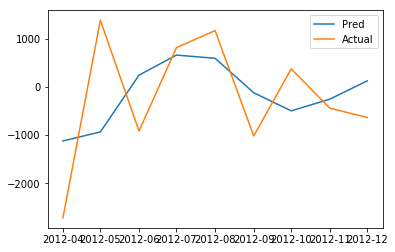

In [18]:
plt.plot(predictions,label='Pred')
plt.plot(test_data,label='Actual')
plt.legend()

In [19]:
model_fit.params

const     1.809863e+01
ar.L1    -3.804898e-01
ar.L2    -3.370577e-01
ar.L3    -4.447948e-01
ar.L4    -4.105435e-01
sigma2    2.686258e+06
dtype: float64

In [20]:
model_fit.params[0]+(model_fit.params[1]*train_data[-1])+(model_fit.params[2]*train_data[-2])+(model_fit.params[3]*train_data[-3])+(model_fit.params[4]*train_data[-4])+(model_fit.params[5]**(1/2))/len(train_data)

-1145.6468577942242

In [21]:
model_fit.params[0]+(model_fit.params[1]*-1145.6468577942242)+(model_fit.params[2]*train_data[-1])+(model_fit.params[3]*train_data[-2])+(model_fit.params[4]*train_data[-3])+(model_fit.params[5]**(1/2))/len(train_data)

-950.0755356047675

In [22]:
model_fit.params[0]+(model_fit.params[1]*-950.0755356047675)+(model_fit.params[2]*-1145.6468577942242)+(model_fit.params[3]*train_data[-1])+(model_fit.params[4]*train_data[-2])+(model_fit.params[5]**(1/2))/len(train_data)

232.11249508511526

In [23]:
dt=train_data
dm=predictions
t=dt.append(dm)
len(t)

323

In [32]:
# Making Stationary data to time series data
x, x_diff = df['Total'][0],t
# Cumulatively sum the values and stack the slices to eliminate
# the difference
Reverse_mechanism = pd.DataFrame(np.r_[x, x_diff].cumsum().astype(float))
#n_gdp_df.plot(figsize=(16,8))

# You can do the same with biz-apps and prod for homework
Reverse_mechanism
np.r_[x, x_diff],x,x_diff

(array([ 9.03400000e+03,  5.62000000e+02,  9.62000000e+02, -1.55600000e+03,
         2.37000000e+02, -2.88000000e+02,  7.17000000e+02,  5.20000000e+02,
        -2.92000000e+02,  7.53000000e+02, -1.73200000e+03, -7.21000000e+02,
         2.57200000e+03,  1.45200000e+03,  2.24300000e+03, -1.51900000e+03,
        -1.94300000e+03, -1.00000000e+00,  8.76000000e+02,  1.14500000e+03,
         4.73000000e+02,  5.47000000e+02, -2.72900000e+03, -9.50000000e+02,
         2.17100000e+03,  1.81000000e+03,  3.33000000e+02, -2.42300000e+03,
        -4.13000000e+02,  1.78000000e+02, -1.99000000e+02,  6.34000000e+02,
        -1.44000000e+02,  6.96000000e+02, -1.19000000e+03, -1.31900000e+03,
         3.50000000e+03,  1.16200000e+03,  4.29000000e+02, -9.72000000e+02,
         1.77000000e+02, -4.19000000e+02,  2.00000000e+02, -1.88000000e+02,
         1.22200000e+03,  3.71000000e+02, -1.54200000e+03, -1.64200000e+03,
         2.97700000e+03,  7.05000000e+02, -5.60000000e+01, -9.76000000e+02,
         6.7

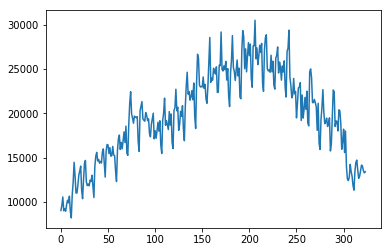

In [25]:
plt.plot(Reverse_mechanism)

In [26]:
rng = pd.date_range(start="1986-01-01",end="2012-12-01",freq='MS')
rng

DatetimeIndex(['1986-01-01', '1986-02-01', '1986-03-01', '1986-04-01',
               '1986-05-01', '1986-06-01', '1986-07-01', '1986-08-01',
               '1986-09-01', '1986-10-01',
               ...
               '2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01'],
              dtype='datetime64[ns]', length=324, freq='MS')

In [27]:
Reverse_mechanism

,0
0,9034.000000
1,9596.000000
2,10558.000000
3,9002.000000
4,9239.000000
...,...
319,14150.715122
320,14026.829311
321,13529.010323
322,13273.413725


In [28]:
Reverse_mechanism.set_index(rng, inplace=True)

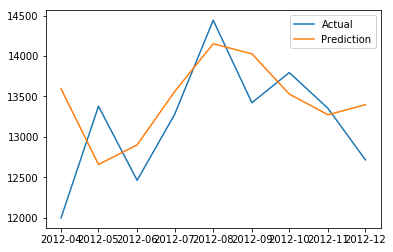

In [29]:
plt.plot(df[-9:],label='Actual')
plt.plot(Reverse_mechanism[-9:],label='Prediction')
plt.legend()

In [30]:
def Get_Prediction_with_sig_lags(params,train):
    pred=[]
    a=params[0]+params[1]*train[-1]+params[2]*train[-2]+params[3]*train[-3]+params[4]*train[-4]+params[5]**(1/2)/len(train)
    pred.append(a)
    b=params[0]+params[1]*a+params[2]*train[-1]+params[3]*train[-2]+params[4]*train[-3]+params[5]**(1/2)/len(train)
    pred.append(b)
    c=params[0]+params[1]*b+params[2]*a+params[3]*train[-1]+params[4]*train[-2]+params[5]**(1/2)/len(train)
    pred.append(c)
    d=params[0]+params[1]*c+params[2]*b+params[3]*a+params[4]*train[-1]+params[5]**(1/2)/len(train)
    pred.append(d)
    e=params[0]+params[1]*d+params[2]*c+params[3]*b+params[4]*a+params[5]**(1/2)/len(train)
    pred.append(e)
    return(pred)

In [31]:
Get_Prediction_with_sig_lags(model_fit.params,train_data)

[-1145.6468577942242,
 -950.0755356047675,
 232.11249508511526,
 653.9631049380799,
 589.1832076115171]